## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [6]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [3]:
# Exercise 1

img = cv.imread("images/dog.jfif")
cv.imshow("img", img)

cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite("images/dog.png", img)


True

In [7]:
# Exercise 2

# first way: Using OpenCV (imread() with flag=0)
img1_color = cv.imread("images/lena.jfif")
img1_grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("img1_color", img1_color)
cv.imshow("img1_grayscale", img1_grayscale)

cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
# Exercise 2

# second way: Using OpenCV (cvtColor() to grayscale the image)
img2_color = cv.imread("images/soccer.jpg")
img2_grayscale = cv.cvtColor(img2_color, cv.COLOR_BGR2GRAY)

cv.imshow("COLOR", img2_color)
cv.imshow("GRAYSCALE", img2_grayscale)

cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
# Exercise 3

cap = cv.VideoCapture("videos/img_pexels.mp4")

width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

scale_factor = 0.5
new_width = int(width * scale_factor)
new_height = int(height * scale_factor)

fourcc = cv.VideoWriter_fourcc(*'mp4v')
fps = 20
out = cv.VideoWriter("videos/smaller_img_pexels.mp4", fourcc, fps, (new_width, new_height))

if not cap.isOpened():
    sys.exit("Video file not found")

while cap.isOpened():
    ret, frame = cap.read()

    # condition control
    if not ret:
        print("Frame not received")
        break


    out.write(frame)
    # display from (too large)
    cv.namedWindow("frame", cv.WINDOW_NORMAL)
    cv.imshow("frame", frame)

    # if user pressed escape, then break
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()

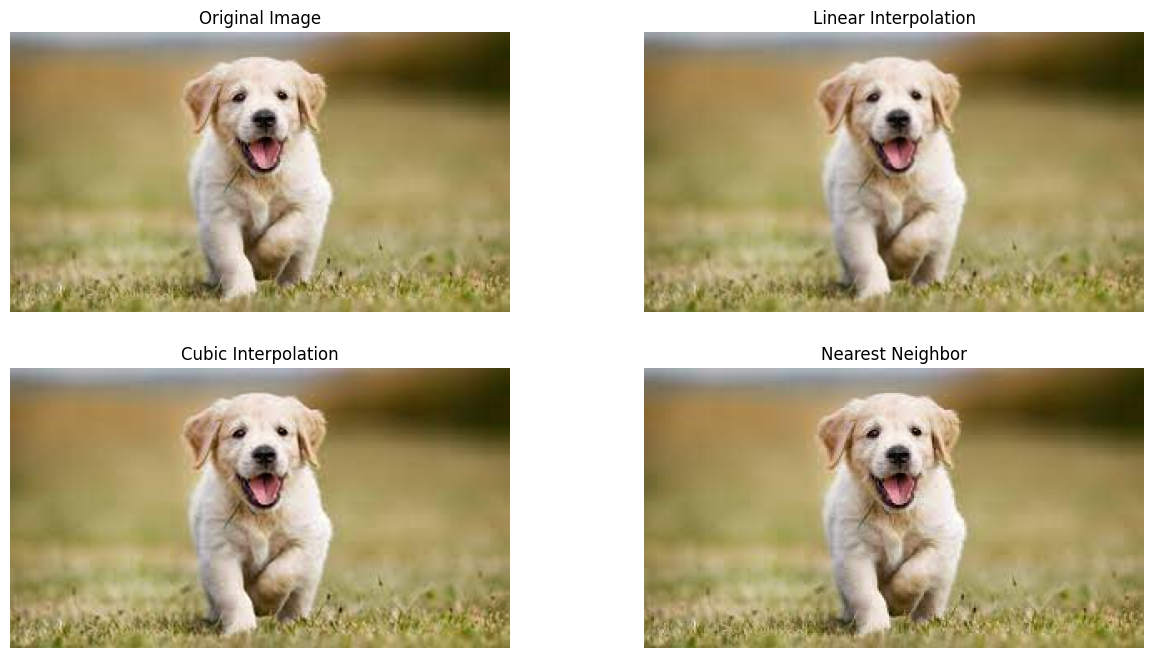

Execution time (Linear Interpolation): 0.004163 seconds
Execution time (Cubic Interpolation): 0.006980 seconds
Execution time (Nearest Neighbor): 0.000000 seconds


In [17]:
import cv2 as cv
import time
import matplotlib.pyplot as plt

img = cv.imread("images/dog.jfif")

scale_factor = 2

def resize_image(img, interpolation):
    start_time = time.time()
    resized_image = cv.resize(img, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=interpolation)
    end_time = time.time()
    execution_time = end_time - start_time
    return resized_image, execution_time

resized_linear, time_linear = resize_image(img, cv.INTER_LINEAR)
resized_cubic, time_cubic = resize_image(img, cv.INTER_CUBIC)
resized_nearest, time_nearest = resize_image(img, cv.INTER_NEAREST)

# Display the original and resized images
titles = ['Original Image', 'Linear Interpolation', 'Cubic Interpolation', 'Nearest Neighbor']
images = [img, resized_linear, resized_cubic, resized_nearest]

plt.figure(figsize=(15, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 0:
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    else:
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Print execution times
print(f"Execution time (Linear Interpolation): {time_linear:.6f} seconds")
print(f"Execution time (Cubic Interpolation): {time_cubic:.6f} seconds")
print(f"Execution time (Nearest Neighbor): {time_nearest:.6f} seconds")